In [134]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

In [138]:
data = pd.read_csv('creditcard.csv')

In [139]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [140]:
data.shape

(284807, 31)

In [142]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [143]:
284315 + 492

284807

In [144]:
284315/284807

0.9982725143693799

In [145]:
data['Class'].value_counts(normalize=True)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

<Axes: xlabel='Class'>

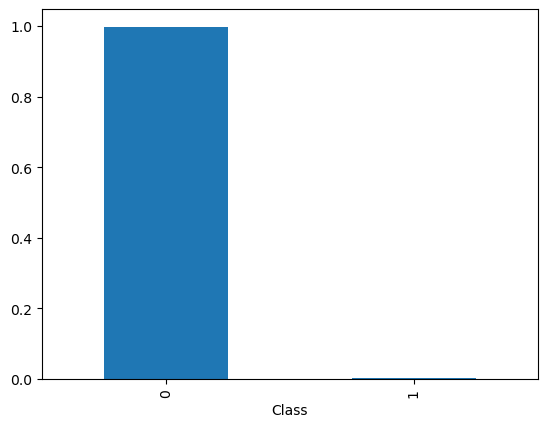

In [146]:
data['Class'].value_counts(normalize=True).plot(kind='bar')

In [147]:
# Undersampling

# 0 - 492
# 1 - 492

#Oversampling

# 0 - 284315
# 1 - 284315

Imbalanced dataset - Accuracy is not the right metric

In [149]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [151]:
X = data.drop(columns = ['Class', 'Time'])
y = data['Class']

In [158]:
train_x, test_x, train_y, test_y =train_test_split(X, y, test_size = 0.2, random_state = 42)

In [161]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((227845, 29), (56962, 29), (227845,), (56962,))

In [164]:
train_y.value_counts(normalize = True), test_y.value_counts(normalize = True)

(Class
 0    0.998271
 1    0.001729
 Name: proportion, dtype: float64,
 Class
 0    0.99828
 1    0.00172
 Name: proportion, dtype: float64)

In [165]:
decision_unbalanced_model =  DecisionTreeClassifier()


In [168]:
decision_unbalanced_model.fit(train_x, train_y)

DecisionTreeClassifier()

In [171]:
train_pred = decision_unbalanced_model.predict(train_x)
test_pred = decision_unbalanced_model.predict(test_x)

In [172]:
print('Train accuracy: ', accuracy_score(train_y, train_pred))
print('Test accuracy: ', accuracy_score(test_y, test_pred))

Train accuracy:  1.0
Test accuracy:  0.9989817773252344


In [173]:
print('Train classification report: ', classification_report(train_y, train_pred))
print('Test classification report: ', classification_report(test_y, test_pred))

Train classification report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845

Test classification report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.68      0.77      0.72        98

    accuracy                           1.00     56962
   macro avg       0.84      0.88      0.86     56962
weighted avg       1.00      1.00      1.00     56962



In [174]:
def model_pred_results(train_x, test_x, train_y, test_y, model):
    model.fit(train_x, train_y)
    train_pred = model.predict(train_x)
    test_pred = model.predict(test_x)
    print('Train accuracy: ', accuracy_score(train_y, train_pred))
    print('Test accuracy: ', accuracy_score(test_y, test_pred))
    print('Train classification report: ', classification_report(train_y, train_pred))
    print('Test classification report: ', classification_report(test_y, test_pred))
    print('Train confusion matrix:', confusion_matrix(train_y, train_pred))
    print('Test confusion matrix:', confusion_matrix(test_y, test_pred))

    return accuracy_score(train_y, train_pred), accuracy_score(test_y, test_pred)

In [175]:
RF_unbalanced_model = RandomForestClassifier()
train_accuracy, test_accuracy = model_pred_results(train_x, test_x, train_y, test_y, RF_unbalanced_model)

Train accuracy:  1.0
Test accuracy:  0.9995962220427653
Train classification report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845

Test classification report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.79      0.87        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Train confusion matrix: [[227451      0]
 [     0    394]]
Test confusion matrix: [[56862     2]
 [   21    77]]


In [176]:
#Standard Scaler

scale = StandardScaler()
X_scaled = pd.DataFrame(scale.fit_transform(X), columns = X.columns)

In [177]:
X_scaled[:4]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,0.083386,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,-0.153350,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,0.190700,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,-0.050468,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534


In [178]:
data_scaled = pd.concat([X_scaled, y], axis = 1)

In [179]:
train_scaled_x, test_scaled_x, train_y, test_y = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

In [180]:
train_scaled_x.shape, test_scaled_x.shape, train_y.shape, test_y.shape

((227845, 29), (56962, 29), (227845,), (56962,))

In [181]:
# UnderSampling

under_sampling = RandomUnderSampler()

In [182]:
train_y.value_counts()

Class
0    227451
1       394
Name: count, dtype: int64

In [183]:
train_scaled_underSample_X, train_y_under_sample = under_sampling.fit_resample(train_scaled_x, train_y)

In [184]:
train_data_scaled_underSample = pd.concat([train_scaled_underSample_X, train_y_under_sample], axis = 1)

In [185]:
train_data_scaled_underSample['Class'].value_counts()

Class
0    394
1    394
Name: count, dtype: int64

<Axes: >

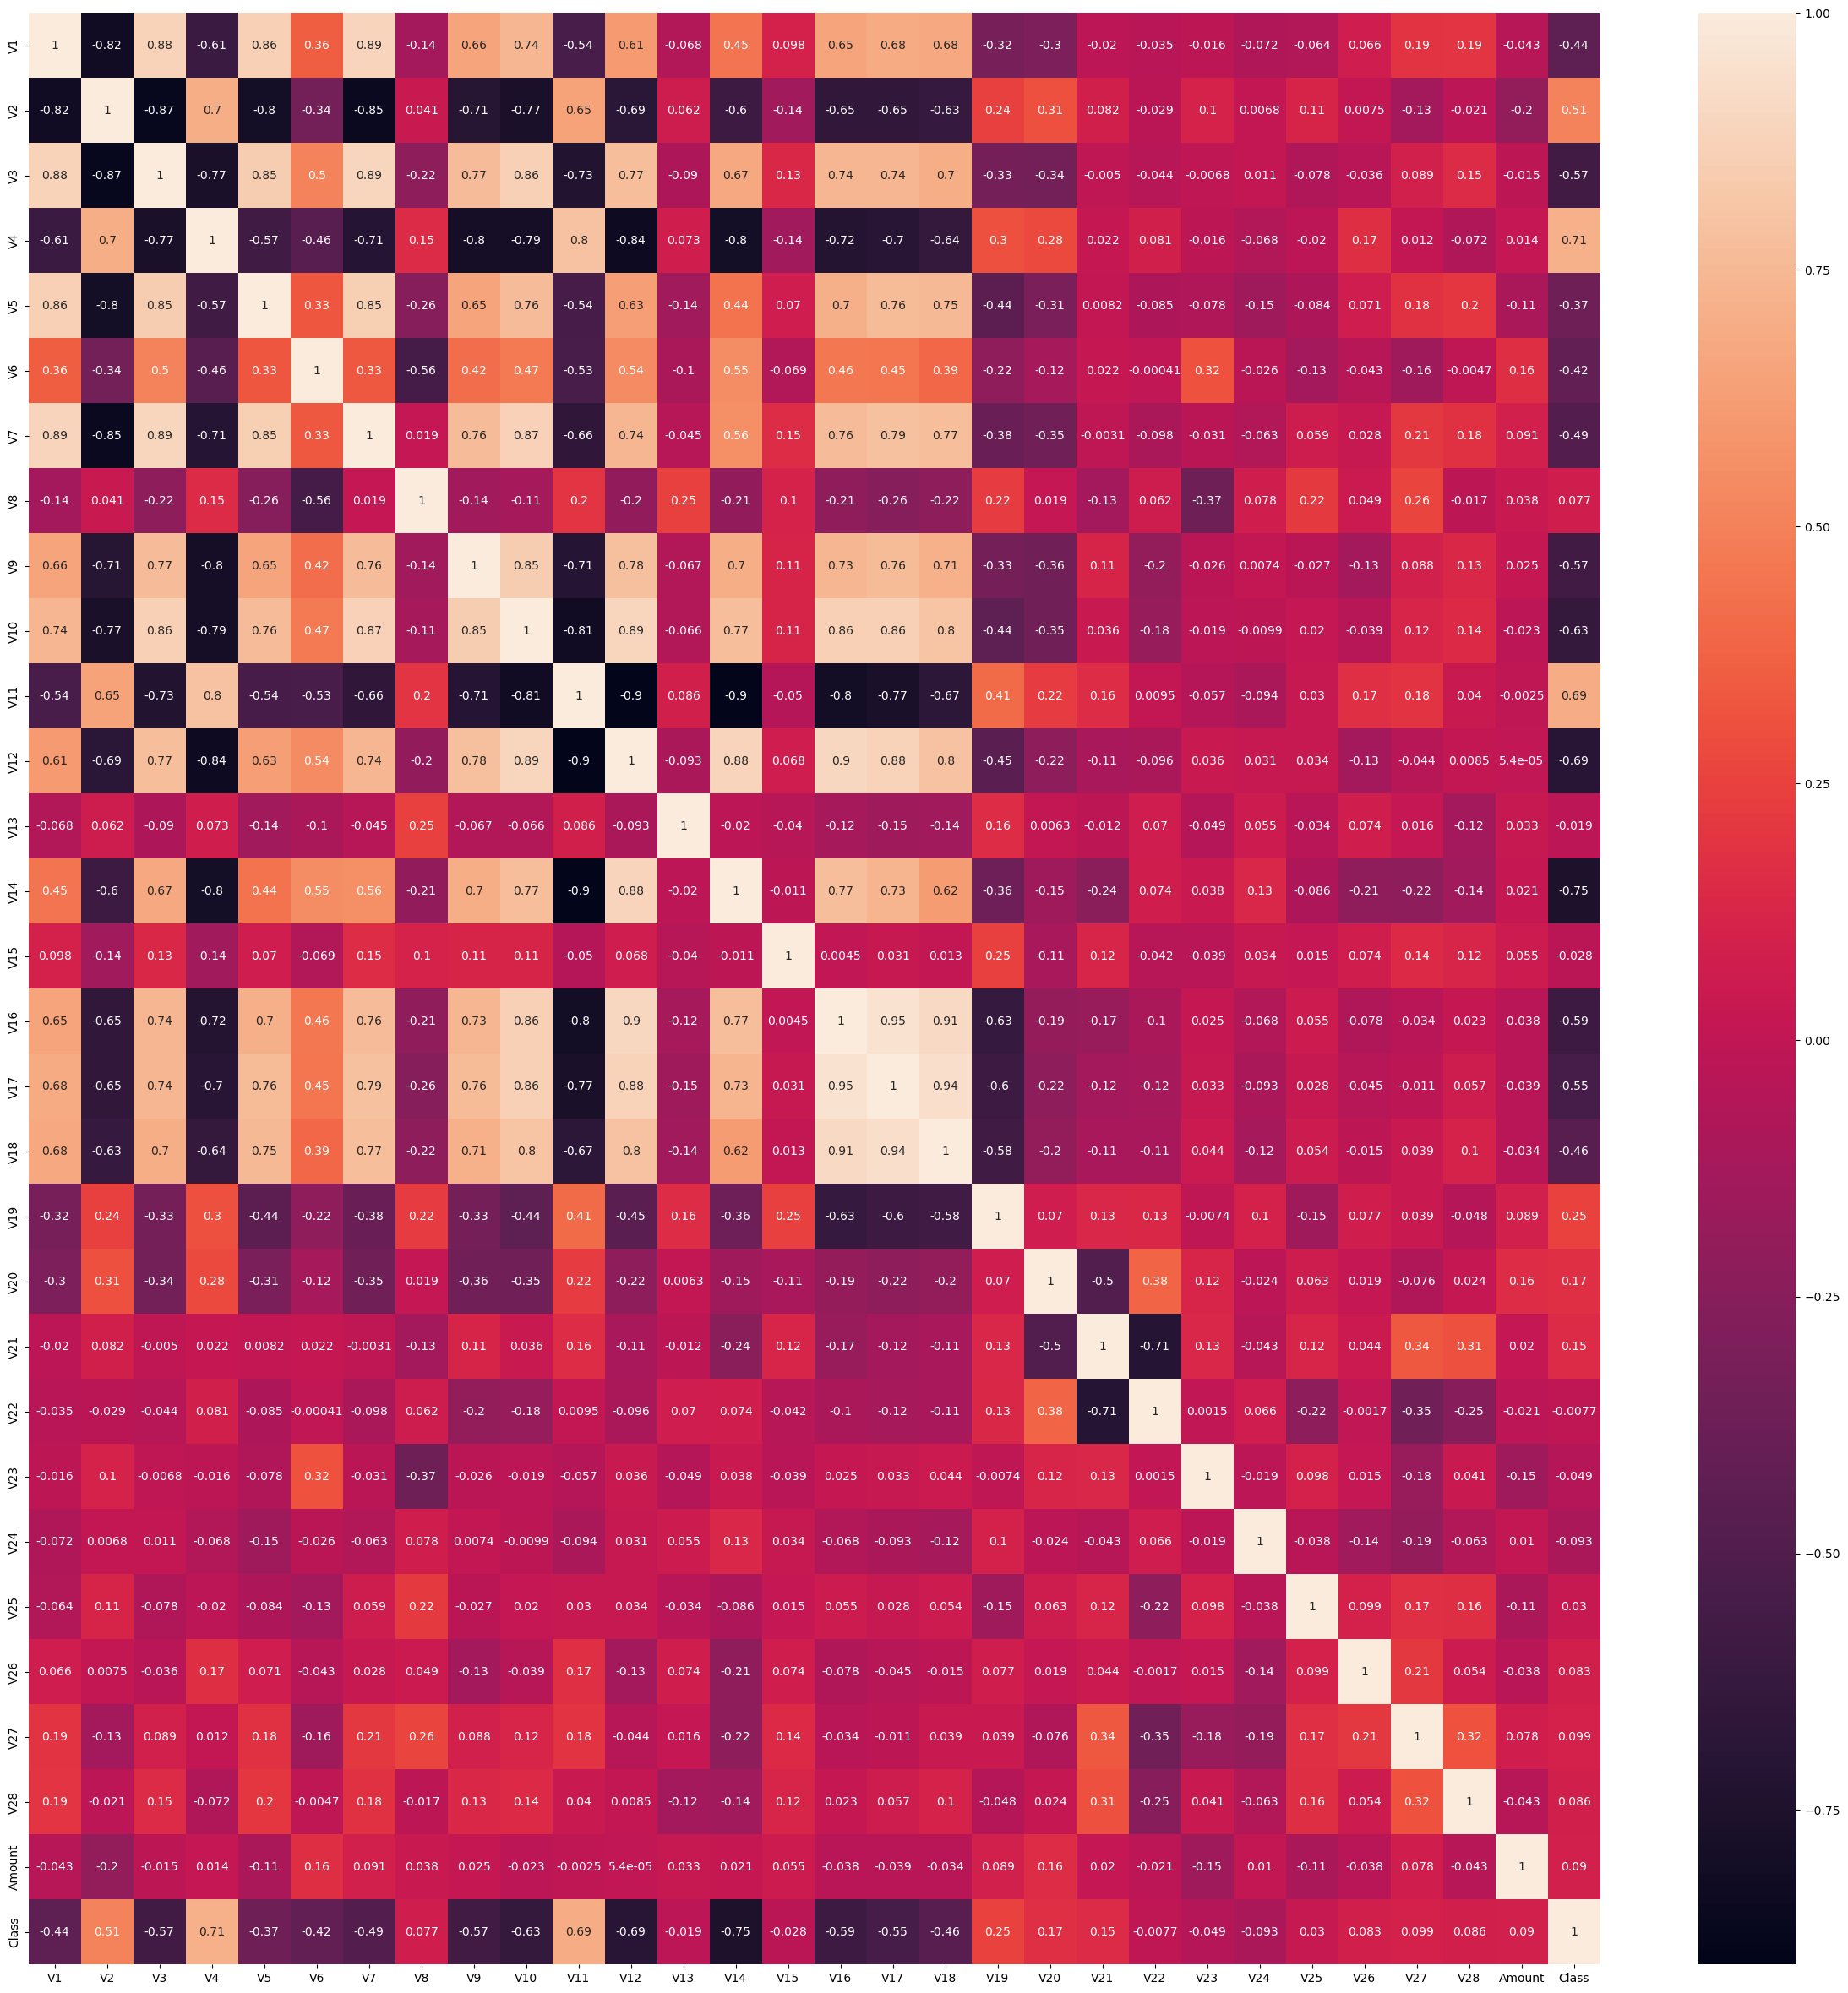

In [186]:
plt.figure(figsize = (30, 30))
sns.heatmap(train_data_scaled_underSample.corr(), annot = True)

In [187]:
DT_balanced_model = DecisionTreeClassifier()
train_accuracy, test_accuracy = model_pred_results(train_scaled_underSample_X, test_scaled_x, train_y_under_sample, test_y, DT_balanced_model)

Train accuracy:  1.0
Test accuracy:  0.8819915031073348
Train classification report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00       394
           1       1.00      1.00      1.00       394

    accuracy                           1.00       788
   macro avg       1.00      1.00      1.00       788
weighted avg       1.00      1.00      1.00       788

Test classification report:                precision    recall  f1-score   support

           0       1.00      0.88      0.94     56864
           1       0.01      0.92      0.03        98

    accuracy                           0.88     56962
   macro avg       0.51      0.90      0.48     56962
weighted avg       1.00      0.88      0.94     56962

Train confusion matrix: [[394   0]
 [  0 394]]
Test confusion matrix: [[50150  6714]
 [    8    90]]


In [188]:
# param_grid = {
#     'n_estimators' : [50, 100, 150, 200, 250],
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [3, 5, 7, 9],
#     'min_samples_split': [3, 5, 7, 9],
#     'min_samples_leaf': [3, 5, 7, 9],
#     'max_features': [0.3, 0.4, 0.5]
# }

param_grid = {
    'n_estimators' : [100, 150],
    # 'criterion': ['gini', 'entropy'],
    'max_depth': [ 5, 7],
    'min_samples_split': [3, 5],
    'min_samples_leaf': [3, 5],
    'max_features': [0.3, 0.4]
}

In [189]:
RF_unbalanced_model = RandomForestClassifier()
train_accuracy, test_accuracy = model_pred_results(train_scaled_underSample_X, test_scaled_x, train_y_under_sample, test_y, RF_unbalanced_model)

Train accuracy:  1.0
Test accuracy:  0.966328429479302
Train classification report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00       394
           1       1.00      1.00      1.00       394

    accuracy                           1.00       788
   macro avg       1.00      1.00      1.00       788
weighted avg       1.00      1.00      1.00       788

Test classification report:                precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.04      0.91      0.08        98

    accuracy                           0.97     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.97      0.98     56962

Train confusion matrix: [[394   0]
 [  0 394]]
Test confusion matrix: [[54955  1909]
 [    9    89]]


In [190]:
grid = GridSearchCV(estimator = RF_unbalanced_model, param_grid = param_grid, cv = 5, verbose = 2, scoring = 'f1')

In [191]:
%%time
grid.fit(train_scaled_underSample_X, train_y_under_sample)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END max_depth=5, max_features=0.3, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=0.3, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=0.3, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=0.3, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=0.3, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=0.3, min_samples_leaf=3, min_samples_split=3, n_estimators=150; total time=   0.3s
[CV] END max_depth=5, max_features=0.3, min_samples_leaf=3, min_samples_split=3, n_estimators=150; total time=   0.3s
[CV] END max_depth=5, max_features=0.3, min_samples_leaf=3, min_samples_split=3, n_estimators=150; total time=  

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 7], 'max_features': [0.3, 0.4],
                         'min_samples_leaf': [3, 5],
                         'min_samples_split': [3, 5],
                         'n_estimators': [100, 150]},
             scoring='f1', verbose=2)

In [192]:
grid.best_estimator_

RandomForestClassifier(max_depth=7, max_features=0.3, min_samples_leaf=5,
                       min_samples_split=3)

In [193]:
grid.best_score_

0.9352428661493267

In [194]:
grid.best_estimator_.oob_score

False

In [195]:
grid.feature_names_in_

array(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype=object)

In [196]:
model = RandomForestClassifier(max_depth=7, max_features=0.3, min_samples_leaf=5, min_samples_split=5)
model.fit(train_scaled_underSample_X, train_y_under_sample)

RandomForestClassifier(max_depth=7, max_features=0.3, min_samples_leaf=5,
                       min_samples_split=5)

In [197]:
model.feature_importances_

array([0.00252716, 0.01327507, 0.03833657, 0.06229071, 0.00563644,
       0.00196257, 0.03139038, 0.0054717 , 0.00453114, 0.16804076,
       0.10124791, 0.1831889 , 0.00215752, 0.23802146, 0.00276899,
       0.02401562, 0.06181264, 0.00542498, 0.0102044 , 0.00694512,
       0.00481418, 0.00301063, 0.00305822, 0.00277015, 0.00238516,
       0.00350782, 0.00271825, 0.0022776 , 0.00620795])

In [198]:
model.feature_names_in_

array(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype=object)

<Axes: >

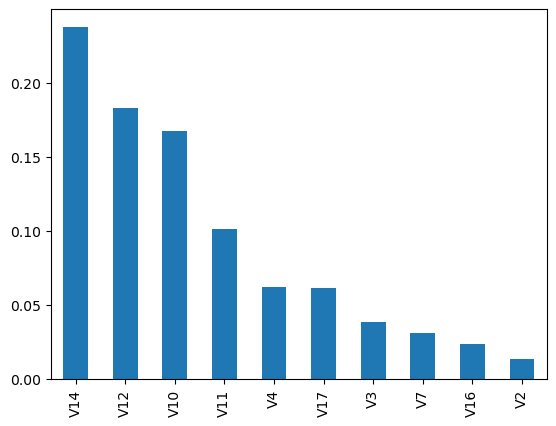

In [199]:
pd.Series(model.feature_importances_, index = model.feature_names_in_).sort_values(ascending = False)[:10].plot(kind = 'bar')

In [200]:

train_accuracy, test_accuracy = model_pred_results(train_scaled_underSample_X, test_scaled_x, train_y_under_sample, test_y, model)

Train accuracy:  0.9720812182741116
Test accuracy:  0.9726835434149081
Train classification report:                precision    recall  f1-score   support

           0       0.95      0.99      0.97       394
           1       0.99      0.95      0.97       394

    accuracy                           0.97       788
   macro avg       0.97      0.97      0.97       788
weighted avg       0.97      0.97      0.97       788

Test classification report:                precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.54     56962
weighted avg       1.00      0.97      0.98     56962

Train confusion matrix: [[392   2]
 [ 20 374]]
Test confusion matrix: [[55316  1548]
 [    8    90]]


In [202]:
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier, StackingClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [203]:
model = AdaBoostClassifier(n_estimators=50)
train_accuracy, test_accuracy = model_pred_results(train_scaled_underSample_X, test_scaled_x, train_y_under_sample, test_y, model)

Train accuracy:  0.9961928934010152
Test accuracy:  0.9462624205610758
Train classification report:                precision    recall  f1-score   support

           0       0.99      1.00      1.00       394
           1       1.00      0.99      1.00       394

    accuracy                           1.00       788
   macro avg       1.00      1.00      1.00       788
weighted avg       1.00      1.00      1.00       788

Test classification report:                precision    recall  f1-score   support

           0       1.00      0.95      0.97     56864
           1       0.03      0.93      0.06        98

    accuracy                           0.95     56962
   macro avg       0.51      0.94      0.51     56962
weighted avg       1.00      0.95      0.97     56962

Train confusion matrix: [[394   0]
 [  3 391]]
Test confusion matrix: [[53810  3054]
 [    7    91]]


In [204]:
# !pip install xgboost

In [205]:
import xgboost as xgb

In [206]:
clf = xgb.XGBClassifier()

In [207]:
train_accuracy, test_accuracy = model_pred_results(train_scaled_underSample_X, test_scaled_x, train_y_under_sample, test_y, clf)


Train accuracy:  1.0
Test accuracy:  0.9551806467469541
Train classification report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00       394
           1       1.00      1.00      1.00       394

    accuracy                           1.00       788
   macro avg       1.00      1.00      1.00       788
weighted avg       1.00      1.00      1.00       788

Test classification report:                precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.03      0.93      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.52     56962
weighted avg       1.00      0.96      0.98     56962

Train confusion matrix: [[394   0]
 [  0 394]]
Test confusion matrix: [[54318  2546]
 [    7    91]]


In [208]:
clf1 = RandomForestClassifier(max_depth=7, max_features=0.3, min_samples_leaf=5, min_samples_split=5)
clf2 = AdaBoostClassifier() 
clf3 = xgb.XGBClassifier()

voting_model = VotingClassifier(estimators=[('rf', clf1), ('ada', clf2), ('xgb', clf3)], voting='soft')

In [209]:
train_accuracy, test_accuracy = model_pred_results(train_scaled_underSample_X, test_scaled_x, train_y_under_sample, test_y, voting_model)


Train accuracy:  1.0
Test accuracy:  0.9620097608932271
Train classification report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00       394
           1       1.00      1.00      1.00       394

    accuracy                           1.00       788
   macro avg       1.00      1.00      1.00       788
weighted avg       1.00      1.00      1.00       788

Test classification report:                precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.93      0.08        98

    accuracy                           0.96     56962
   macro avg       0.52      0.95      0.53     56962
weighted avg       1.00      0.96      0.98     56962

Train confusion matrix: [[394   0]
 [  0 394]]
Test confusion matrix: [[54707  2157]
 [    7    91]]


In [210]:
# stacking

In [211]:
estimators = [
    ('rf1', RandomForestClassifier(max_depth=7, max_features=0.3, min_samples_leaf=5, min_samples_split=5)),
    ('rf2', RandomForestClassifier()),
    ('xgb', xgb.XGBClassifier()),
    ('ada', AdaBoostClassifier())]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

In [212]:
train_accuracy, test_accuracy = model_pred_results(train_scaled_underSample_X, test_scaled_x, train_y_under_sample, test_y, clf)


Train accuracy:  1.0
Test accuracy:  0.9567430918858186
Train classification report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00       394
           1       1.00      1.00      1.00       394

    accuracy                           1.00       788
   macro avg       1.00      1.00      1.00       788
weighted avg       1.00      1.00      1.00       788

Test classification report:                precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.93      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.52     56962
weighted avg       1.00      0.96      0.98     56962

Train confusion matrix: [[394   0]
 [  0 394]]
Test confusion matrix: [[54407  2457]
 [    7    91]]


In [262]:
estimators = [
    ('rf1', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('rf2', RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=50)),
    ('ada', AdaBoostClassifier(n_estimators=50)),
    ('voting',voting_model )
    
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

In [264]:
train_accuracy, test_accuracy = model_pred_results(train_scaled_underSample_X, test_scaled_x, train_y_under_sample, test_y, clf)


Train accuracy:  0.998730964467005
Test accuracy:  0.9602366489940662
Train classification report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00       394
           1       1.00      1.00      1.00       394

    accuracy                           1.00       788
   macro avg       1.00      1.00      1.00       788
weighted avg       1.00      1.00      1.00       788

Test classification report:                precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.94      0.08        98

    accuracy                           0.96     56962
   macro avg       0.52      0.95      0.53     56962
weighted avg       1.00      0.96      0.98     56962

Train confusion matrix: [[394   0]
 [  1 393]]
Test confusion matrix: [[54605  2259]
 [    6    92]]
